In [1]:
import numpy as np
import matplotlib.pyplot as plt


In [2]:
# v2 removes the spectra and adds the minimization

# v3 looks at both joint and constrained wc-only chi2s and delta chi2s from the framework
# (also can potentially generate chi2s with python, since the toy data counts are saved)

# v4 looks at the minimization points for each toy

# v6 looks at the real data vs large scaling points, pretty much unrelated from previous versions

# v7 adds the chi2 map for real data at many different points


# Loading Files

In [3]:
from scipy.special import erfinv, erfcinv
from scipy.stats import chi2
from scipy.stats import poisson

def get_significance(p_value):
    
    # probability of getting a more extreme result
    #p_value = 1. - chi2.cdf(chisquare, ndf)
    
    sigma = np.sqrt(2.) * erfcinv(p_value)
    
    #if printout: print(f"chi2/ndf: {chisquare}/{ndf}, p value: {p_value}, significance: {sigma} sigma")

    return sigma


In [4]:
with open("../TLee_Np0p/cv_and_cov_csv_outputs/lee_1_1/pred_newworld.csv") as f:
    line = f.readlines()[0]
    pred_1_1 = np.array([float(x) for x in line.split(",")[:-1]])

with open("../TLee_Np0p/cv_and_cov_csv_outputs/lee_1_1/pred_newworld.csv") as f:
    line = f.readlines()[0]
    pred_1_1 = np.array([float(x) for x in line.split(",")[:-1]])

with open("../TLee_Np0p/cv_and_cov_csv_outputs/lee_1_1/meas.csv") as f:
    line = f.readlines()[0]
    real_data = np.array([float(x) for x in line.split(",")[:-1]])

real_data_err = np.sqrt(real_data)

In [5]:
# generated a large scaling point prediction and covariance using a toy that ended up being minimized at a high point

"""
(1, 1) toy #283 fake data: 109 0 205 0 155 0 269 0 0 20 251 490 606 571 515 390 386 69 87 67 55 52 20 46 0 208 1028 945 802 480 383 161 51 82 39 36 2 21 5 32 0 9 126 768 1643 2591 3162 3168 2964 2397 1755 1505 1084 744 472 1096 15 28 675 1758 1998 2056 1818 1710 1529 1249 1018 894 518 253 383 614 
(1, 1) toy #283 vs (1, 1) chi2 = 89.7803
(1, 1) toy #283 minimization point = (1248.43, 1e-06)
(1, 1) toy #283 vs (1, 1) chi2_min = 50.7839
(1, 1) toy #283 vs (1, 1) dchi2 = 38.9964
"""

with open("../TLee_Np0p/data_pred_cov_file_1_1.csv") as f:
    lines = f.readlines()
pred_1_1 = np.array([float(x) for x in lines[1].split(":")[1].strip().split(",")[:-1]])
cov_1_1 = np.zeros((72, 72))
for i, line in enumerate(lines[3:]):
    if len(line) < 10:
        break
    nums = line.split(",")[:-1]
    for j, num in enumerate(nums):
        cov_1_1[i, j] = float(num)

with open("../TLee_Np0p/data_pred_cov_file_15_5.csv") as f:
    lines = f.readlines()
pred_15_5 = np.array([float(x) for x in lines[1].split(":")[1].strip().split(",")[:-1]])
cov_15_5 = np.zeros((72, 72))
for i, line in enumerate(lines[3:]):
    if len(line) < 10:
        break
    nums = line.split(",")[:-1]
    for j, num in enumerate(nums):
        cov_15_5[i, j] = float(num)

with open("../TLee_Np0p/data_pred_cov_file_1248_0.csv") as f:
    lines = f.readlines()
pred_1248_0 = np.array([float(x) for x in lines[1].split(":")[1].strip().split(",")[:-1]])
cov_1248_0 = np.zeros((72, 72))
for i, line in enumerate(lines[3:]):
    if len(line) < 10:
        break
    nums = line.split(",")[:-1]
    for j, num in enumerate(nums):
        cov_1248_0[i, j] = float(num)

#for i in range(72):
#    print(f"{weird_data_direct[i]}, {weird_data_from_chi2_csv[i]}, {pred_1_1[i]}, {pred_1_1_from_chi2_csv[i]}")


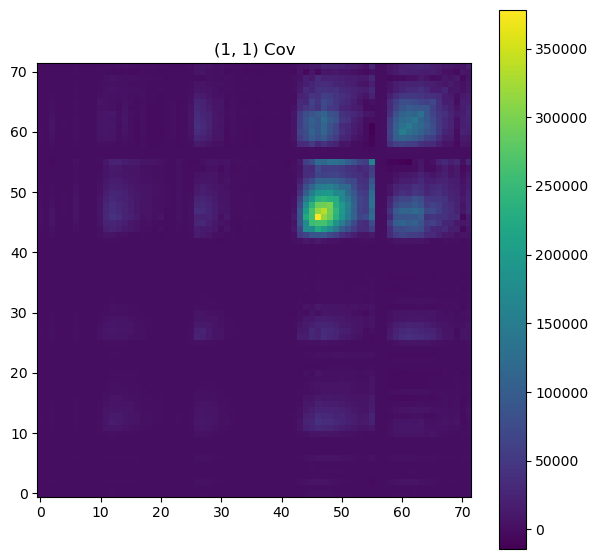

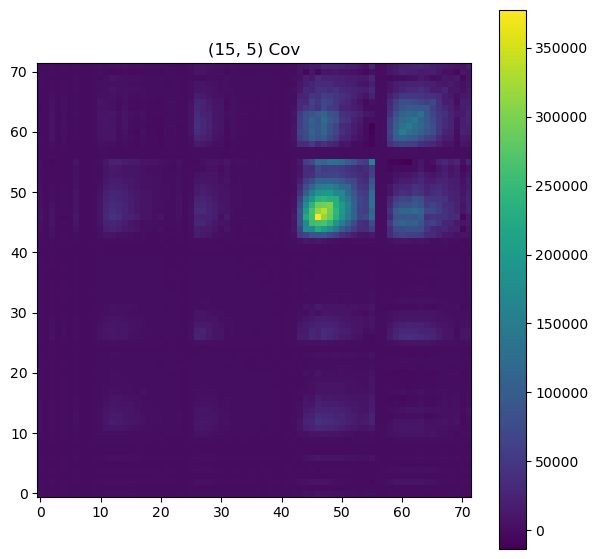

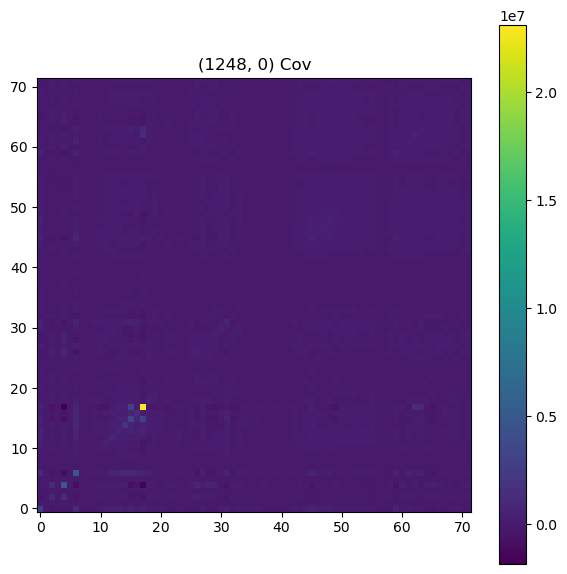

In [6]:
plt.figure(figsize=(7, 7))
plt.imshow(cov_1_1, origin='lower')
plt.colorbar()
plt.title("(1, 1) Cov")
plt.show()

plt.figure(figsize=(7, 7))
plt.imshow(cov_15_5, origin='lower')
plt.colorbar()
plt.title("(15, 5) Cov")
plt.show()

plt.figure(figsize=(7, 7))
plt.imshow(cov_1248_0, origin='lower')
plt.colorbar()
plt.title("(1248, 0) Cov")
plt.show()



# Unconstrained Data vs Pred, Chi^2

In [7]:
# TODO: add (0.529744, 2.25335) best fit point (when seeded at 15, 5, but probably independent of the seed)

pred_errs_1_1 = np.sqrt(np.diag(cov_1_1))
pred_errs_15_5 = np.sqrt(np.diag(cov_15_5))
pred_errs_1248_0 = np.sqrt(np.diag(cov_1248_0))

diff_1_1 = real_data - pred_1_1
diff_15_5 = real_data - pred_15_5
diff_1248_0 = real_data - pred_1248_0

chi2_1_1 = diff_1_1 @ np.linalg.inv(cov_1_1) @ diff_1_1
chi2_15_5 = diff_15_5 @ np.linalg.inv(cov_15_5) @ diff_15_5
chi2_1248_0 = diff_1248_0 @ np.linalg.inv(cov_1248_0) @ diff_1248_0


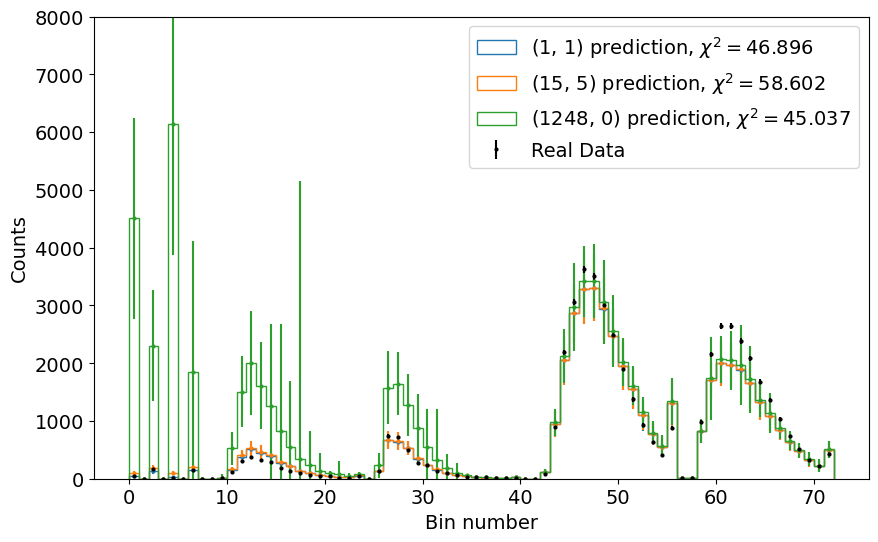

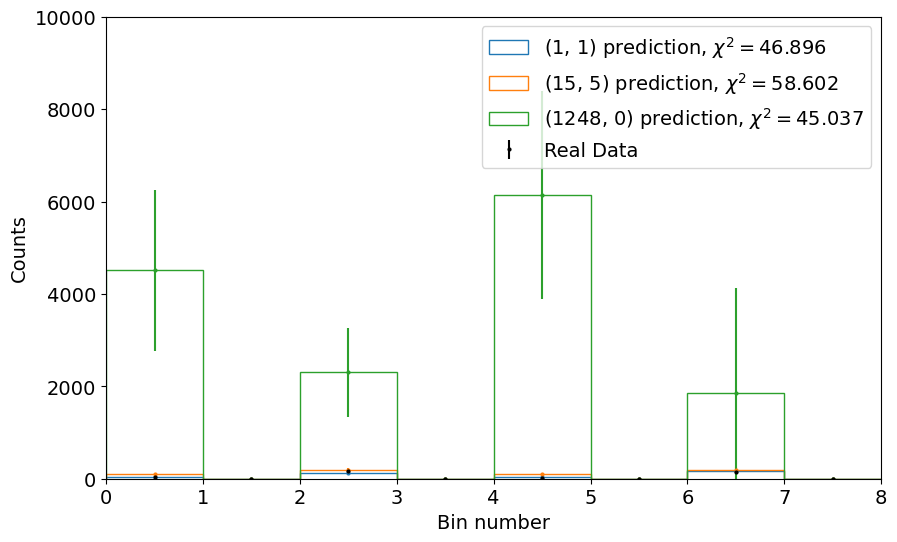

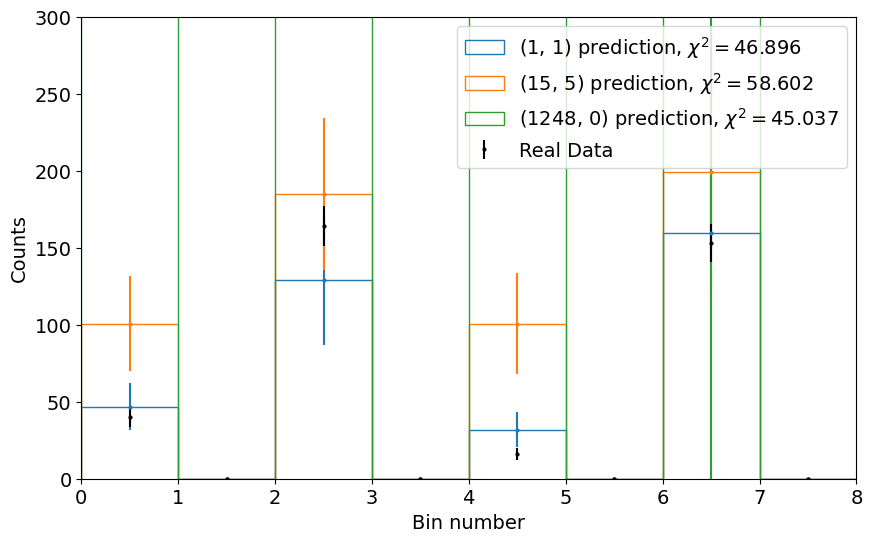

In [8]:
num_bins = len(pred_1_1)
bins = np.linspace(0, num_bins, num_bins+1)
bin_centers = (bins[1:] + bins[:-1]) / 2

plt.rcParams.update({'font.size': 14})

plt.figure(figsize=(10, 6))

plt.hist(bin_centers, weights=pred_1_1, bins=bins, histtype="step", label=rf'(1, 1) prediction, $\chi^2=${chi2_1_1:.3f}')
plt.hist(bin_centers, weights=pred_15_5, bins=bins, histtype="step", label=rf'(15, 5) prediction, $\chi^2=${chi2_15_5:.3f}')
plt.hist(bin_centers, weights=pred_1248_0, bins=bins, histtype="step", label=rf'(1248, 0) prediction, $\chi^2=${chi2_1248_0:.3f}')
plt.errorbar(bin_centers, pred_1_1, yerr=pred_errs_1_1, c="tab:blue", fmt="o", markersize=2)
plt.errorbar(bin_centers, pred_15_5, yerr=pred_errs_15_5, c="tab:orange", fmt="o", markersize=2)
plt.errorbar(bin_centers, pred_1248_0, yerr=pred_errs_1248_0, c="tab:green", fmt="o", markersize=2)
plt.errorbar(bin_centers, real_data, yerr=real_data_err, label="Real Data", c="k", fmt="o", markersize=2)
plt.legend()
plt.xlabel('Bin number')
plt.ylabel('Counts')
plt.ylim(0, 8000)
plt.show()


plt.figure(figsize=(10, 6))
plt.hist(bin_centers, weights=pred_1_1, bins=bins, histtype="step", label=rf'(1, 1) prediction, $\chi^2=${chi2_1_1:.3f}')
plt.hist(bin_centers, weights=pred_15_5, bins=bins, histtype="step", label=rf'(15, 5) prediction, $\chi^2=${chi2_15_5:.3f}')
plt.hist(bin_centers, weights=pred_1248_0, bins=bins, histtype="step", label=rf'(1248, 0) prediction, $\chi^2=${chi2_1248_0:.3f}')
plt.errorbar(bin_centers, pred_1_1, yerr=pred_errs_1_1, c="tab:blue", fmt="o", markersize=2)
plt.errorbar(bin_centers, pred_15_5, yerr=pred_errs_15_5, c="tab:orange", fmt="o", markersize=2)
plt.errorbar(bin_centers, pred_1248_0, yerr=pred_errs_1248_0, c="tab:green", fmt="o", markersize=2)
plt.errorbar(bin_centers, real_data, yerr=real_data_err, label="Real Data", c="k", fmt="o", markersize=2)
plt.legend()
plt.xlabel('Bin number')
plt.ylabel('Counts')
plt.xlim(0, 8)
plt.ylim(0, 10000)
plt.show()

plt.figure(figsize=(10, 6))
plt.hist(bin_centers, weights=pred_1_1, bins=bins, histtype="step", label=rf'(1, 1) prediction, $\chi^2=${chi2_1_1:.3f}')
plt.hist(bin_centers, weights=pred_15_5, bins=bins, histtype="step", label=rf'(15, 5) prediction, $\chi^2=${chi2_15_5:.3f}')
plt.hist(bin_centers, weights=pred_1248_0, bins=bins, histtype="step", label=rf'(1248, 0) prediction, $\chi^2=${chi2_1248_0:.3f}')
plt.errorbar(bin_centers, pred_1_1, yerr=pred_errs_1_1, c="tab:blue", fmt="o", markersize=2)
plt.errorbar(bin_centers, pred_15_5, yerr=pred_errs_15_5, c="tab:orange", fmt="o", markersize=2)
plt.errorbar(bin_centers, pred_1248_0, yerr=pred_errs_1248_0, c="tab:green", fmt="o", markersize=2)
plt.errorbar(bin_centers, real_data, yerr=real_data_err, label="Real Data", c="k", fmt="o", markersize=2)
plt.legend()
plt.xlabel('Bin number')
plt.ylabel('Counts')
plt.xlim(0, 8)
plt.ylim(0, 300)
plt.show()



# Constrained Data vs Pred, Chi^2

In [9]:
# TODO: add (0.0279515, 4.24154) best fit point (when seeded at 15, 5, but probably independent of the seed)

cov = cov_1_1
pred = pred_1_1
exp = real_data

cov_xx = cov[:8, :8]
cov_yy = cov[8:, 8:]
cov_xy = cov[:8, 8:]
mu_x = pred[:8]
mu_y = pred[8:]
exp_x = exp[:8]
exp_y = exp[8:]

unconstr_errs = np.sqrt(np.diag(cov_xx))

mu_x_constr = mu_x + cov_xy @ np.linalg.inv(cov_yy) @ (exp_y - mu_y)
cov_xx_constr = cov_xx - cov_xy @ np.linalg.inv(cov_yy) @ cov_xy.T

unconstr_diff = exp_x - mu_x
constr_diff = exp_x - mu_x_constr
unconstr_chi2 = unconstr_diff @ np.linalg.inv(cov_xx) @ unconstr_diff
constr_chi2 = constr_diff @ np.linalg.inv(cov_xx_constr) @ constr_diff

unconstr_errs = np.sqrt(np.diag(cov_xx))
constr_errs = np.sqrt(np.diag(cov_xx_constr))


unconstr_pred_1_1 = mu_x
unconstr_errs_1_1 = unconstr_errs
unconstr_chi2_1_1 = unconstr_chi2

constr_pred_1_1 = mu_x_constr
constr_err_1_1 = constr_errs
constr_chi2_1_1 = constr_chi2

unconstr_cov_1_1 = cov_xx
constr_cov_1_1 = cov_xx_constr


In [10]:
cov = cov_15_5
pred = pred_15_5
exp = real_data

cov_xx = cov[:8, :8]
cov_yy = cov[8:, 8:]
cov_xy = cov[:8, 8:]
mu_x = pred[:8]
mu_y = pred[8:]
exp_x = exp[:8]
exp_y = exp[8:]

unconstr_errs = np.sqrt(np.diag(cov_xx))

mu_x_constr = mu_x + cov_xy @ np.linalg.inv(cov_yy) @ (exp_y - mu_y)
cov_xx_constr = cov_xx - cov_xy @ np.linalg.inv(cov_yy) @ cov_xy.T

unconstr_diff = exp_x - mu_x
constr_diff = exp_x - mu_x_constr
unconstr_chi2 = unconstr_diff @ np.linalg.inv(cov_xx) @ unconstr_diff
constr_chi2 = constr_diff @ np.linalg.inv(cov_xx_constr) @ constr_diff

unconstr_errs = np.sqrt(np.diag(cov_xx))
constr_errs = np.sqrt(np.diag(cov_xx_constr))

unconstr_pred_best_15_5 = mu_x
unconstr_errs_best_15_5 = unconstr_errs
unconstr_chi2_best_15_5 = unconstr_chi2

constr_pred_best_15_5 = mu_x_constr
constr_err_best_15_5 = constr_errs
constr_chi2_best_15_5 = constr_chi2

unconstr_cov_best_15_5 = cov_xx
constr_cov_best_15_5 = cov_xx_constr


In [11]:
cov = cov_1248_0
pred = pred_1248_0
exp = real_data

cov_xx = cov[:8, :8]
cov_yy = cov[8:, 8:]
cov_xy = cov[:8, 8:]
mu_x = pred[:8]
mu_y = pred[8:]
exp_x = exp[:8]
exp_y = exp[8:]

unconstr_errs = np.sqrt(np.diag(cov_xx))

mu_x_constr = mu_x + cov_xy @ np.linalg.inv(cov_yy) @ (exp_y - mu_y)
cov_xx_constr = cov_xx - cov_xy @ np.linalg.inv(cov_yy) @ cov_xy.T

unconstr_diff = exp_x - mu_x
constr_diff = exp_x - mu_x_constr
unconstr_chi2 = unconstr_diff @ np.linalg.inv(cov_xx) @ unconstr_diff
constr_chi2 = constr_diff @ np.linalg.inv(cov_xx_constr) @ constr_diff

unconstr_errs = np.sqrt(np.diag(cov_xx))
constr_errs = np.sqrt(np.diag(cov_xx_constr))

unconstr_pred_best_1248_0 = mu_x
unconstr_errs_best_1248_0 = unconstr_errs
unconstr_chi2_best_1248_0 = unconstr_chi2

constr_pred_best_1248_0 = mu_x_constr
constr_err_best_1248_0 = constr_errs
constr_chi2_best_1248_0 = constr_chi2

unconstr_cov_best_1248_0 = cov_xx
constr_cov_best_1248_0 = cov_xx_constr

8


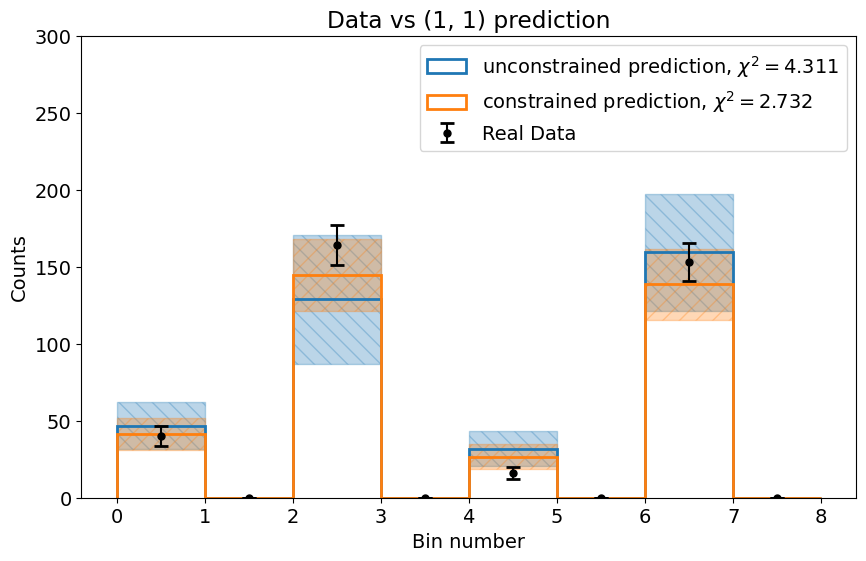

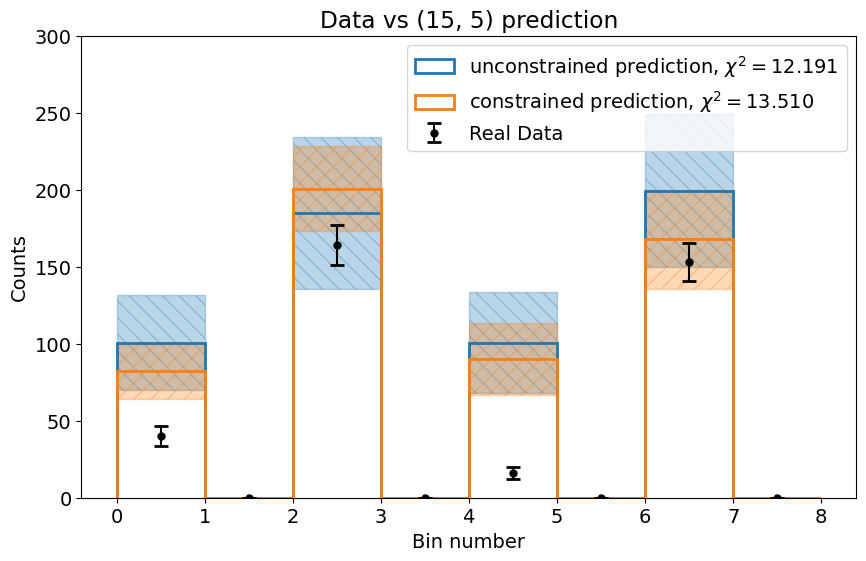

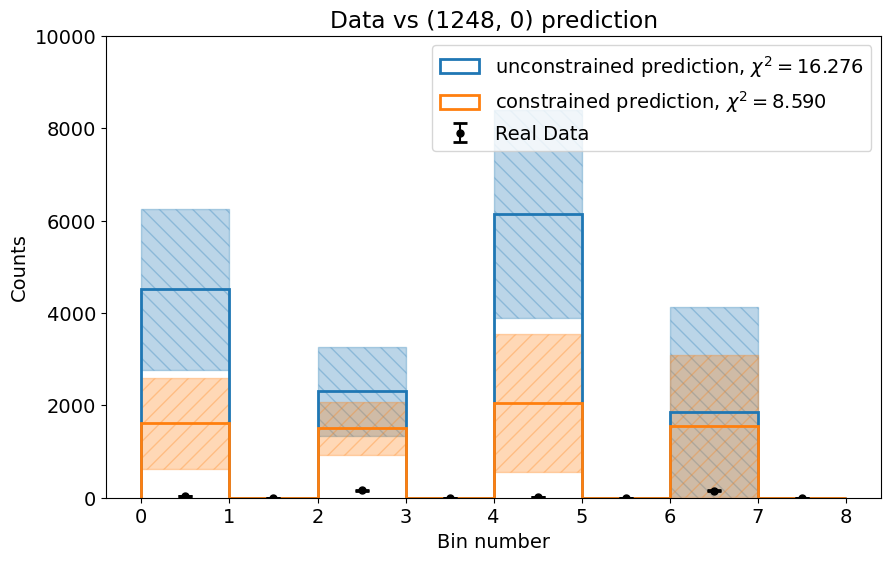

In [12]:
num_bins = len(unconstr_pred_1_1)
bins = np.linspace(0, num_bins, num_bins+1)
bin_centers = (bins[1:] + bins[:-1]) / 2

doubled_bins = []
for bin in bins:
    doubled_bins.append(bin)
    doubled_bins.append(bin)

doubled_bins = doubled_bins[1:]
doubled_bins = doubled_bins[:-1]

doubled_lower_errs_1_1 = []
doubled_upper_errs_1_1 = []
doubled_lower_errs_1_1_constr = []
doubled_upper_errs_1_1_constr = []
doubled_lower_errs_15_5 = []
doubled_upper_errs_15_5 = []
doubled_lower_errs_15_5_constr = []
doubled_upper_errs_15_5_constr = []
doubled_lower_errs_1248_0 = []
doubled_upper_errs_1248_0 = []
doubled_lower_errs_1248_0_constr = []
doubled_upper_errs_1248_0_constr = []
print(num_bins)
for i in range(num_bins):

    doubled_lower_errs_1_1.append(unconstr_pred_1_1[i] - unconstr_errs_1_1[i])
    doubled_lower_errs_1_1.append(unconstr_pred_1_1[i] - unconstr_errs_1_1[i])
    doubled_upper_errs_1_1.append(unconstr_pred_1_1[i] + unconstr_errs_1_1[i])
    doubled_upper_errs_1_1.append(unconstr_pred_1_1[i] + unconstr_errs_1_1[i])
    doubled_lower_errs_1_1_constr.append(constr_pred_1_1[i] - constr_err_1_1[i])
    doubled_lower_errs_1_1_constr.append(constr_pred_1_1[i] - constr_err_1_1[i])
    doubled_upper_errs_1_1_constr.append(constr_pred_1_1[i] + constr_err_1_1[i])
    doubled_upper_errs_1_1_constr.append(constr_pred_1_1[i] + constr_err_1_1[i])

    doubled_lower_errs_15_5.append(unconstr_pred_best_15_5[i] - unconstr_errs_best_15_5[i])
    doubled_lower_errs_15_5.append(unconstr_pred_best_15_5[i] - unconstr_errs_best_15_5[i])
    doubled_upper_errs_15_5.append(unconstr_pred_best_15_5[i] + unconstr_errs_best_15_5[i])
    doubled_upper_errs_15_5.append(unconstr_pred_best_15_5[i] + unconstr_errs_best_15_5[i])
    doubled_lower_errs_15_5_constr.append(constr_pred_best_15_5[i] - constr_err_best_15_5[i])
    doubled_lower_errs_15_5_constr.append(constr_pred_best_15_5[i] - constr_err_best_15_5[i])
    doubled_upper_errs_15_5_constr.append(constr_pred_best_15_5[i] + constr_err_best_15_5[i])
    doubled_upper_errs_15_5_constr.append(constr_pred_best_15_5[i] + constr_err_best_15_5[i])

    doubled_lower_errs_1248_0.append(unconstr_pred_best_1248_0[i] - unconstr_errs_best_1248_0[i])
    doubled_lower_errs_1248_0.append(unconstr_pred_best_1248_0[i] - unconstr_errs_best_1248_0[i])
    doubled_upper_errs_1248_0.append(unconstr_pred_best_1248_0[i] + unconstr_errs_best_1248_0[i])
    doubled_upper_errs_1248_0.append(unconstr_pred_best_1248_0[i] + unconstr_errs_best_1248_0[i])
    doubled_lower_errs_1248_0_constr.append(constr_pred_best_1248_0[i] - constr_err_best_1248_0[i])
    doubled_lower_errs_1248_0_constr.append(constr_pred_best_1248_0[i] - constr_err_best_1248_0[i])
    doubled_upper_errs_1248_0_constr.append(constr_pred_best_1248_0[i] + constr_err_best_1248_0[i])
    doubled_upper_errs_1248_0_constr.append(constr_pred_best_1248_0[i] + constr_err_best_1248_0[i])


lw=2

plt.rcParams.update({'font.size': 14})

plt.figure(figsize=(10, 6))
plt.fill_between(doubled_bins, doubled_lower_errs_1_1, doubled_upper_errs_1_1, color="tab:blue", alpha=0.3, hatch="\\\\")
plt.fill_between(doubled_bins, doubled_lower_errs_1_1_constr, doubled_upper_errs_1_1_constr, color="tab:orange", alpha=0.3, hatch="//")
plt.hist(bin_centers, weights=unconstr_pred_1_1, bins=bins, histtype="step", lw=lw, color="tab:blue", label=rf'unconstrained prediction, $\chi^2=${unconstr_chi2_1_1:.3f}')
plt.hist(bin_centers, weights=constr_pred_1_1, bins=bins, histtype="step", lw=lw, color="tab:orange", label=rf'constrained prediction, $\chi^2=${constr_chi2_1_1:.3f}')
plt.errorbar(bin_centers, real_data[:8], yerr=real_data_err[:8], label="Real Data", c="k", fmt="o", markersize=5, capsize=5, capthick=2)
plt.legend()
plt.xlabel('Bin number')
plt.ylabel('Counts')
plt.ylim(0, 300)
plt.title("Data vs (1, 1) prediction")
plt.show()

plt.figure(figsize=(10, 6))
plt.fill_between(doubled_bins, doubled_lower_errs_15_5, doubled_upper_errs_15_5, color="tab:blue", alpha=0.3, hatch="\\\\")
plt.fill_between(doubled_bins, doubled_lower_errs_15_5_constr, doubled_upper_errs_15_5_constr, color="tab:orange", alpha=0.3, hatch="//")
plt.hist(bin_centers, weights=unconstr_pred_best_15_5, bins=bins, histtype="step", lw=lw, color="tab:blue", label=rf'unconstrained prediction, $\chi^2=${unconstr_chi2_best_15_5:.3f}')
plt.hist(bin_centers, weights=constr_pred_best_15_5, bins=bins, histtype="step", lw=lw, color="tab:orange", label=rf'constrained prediction, $\chi^2=${constr_chi2_best_15_5:.3f}')
plt.errorbar(bin_centers, real_data[:8], yerr=real_data_err[:8], label="Real Data", c="k", fmt="o", markersize=5, capsize=5, capthick=2)
plt.legend()
plt.xlabel('Bin number')
plt.ylabel('Counts')
plt.ylim(0, 300)
plt.title("Data vs (15, 5) prediction")
plt.show()

plt.figure(figsize=(10, 6))
plt.fill_between(doubled_bins, doubled_lower_errs_1248_0, doubled_upper_errs_1248_0, color="tab:blue", alpha=0.3, hatch="\\\\")
plt.fill_between(doubled_bins, doubled_lower_errs_1248_0_constr, doubled_upper_errs_1248_0_constr, color="tab:orange", alpha=0.3, hatch="//")
plt.hist(bin_centers, weights=unconstr_pred_best_1248_0, bins=bins, histtype="step", lw=lw, color="tab:blue", label=rf'unconstrained prediction, $\chi^2=${unconstr_chi2_best_1248_0:.3f}')
plt.hist(bin_centers, weights=constr_pred_best_1248_0, bins=bins, histtype="step", lw=lw, color="tab:orange", label=rf'constrained prediction, $\chi^2=${constr_chi2_best_1248_0:.3f}')
plt.errorbar(bin_centers, real_data[:8], yerr=real_data_err[:8], label="Real Data", c="k", fmt="o", markersize=5, capsize=5, capthick=2)
plt.legend()
plt.xlabel('Bin number')
plt.ylabel('Counts')
plt.ylim(0, 10000)
plt.title("Data vs (1248, 0) prediction")
plt.show()


# Chi2 Maps

## Joint $\chi^2$

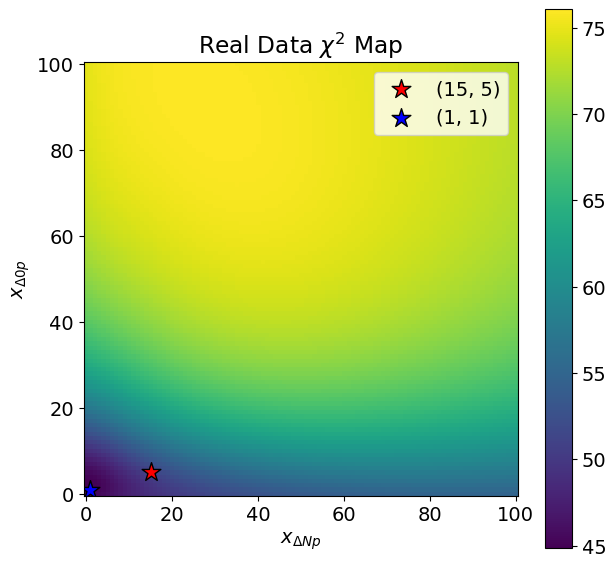

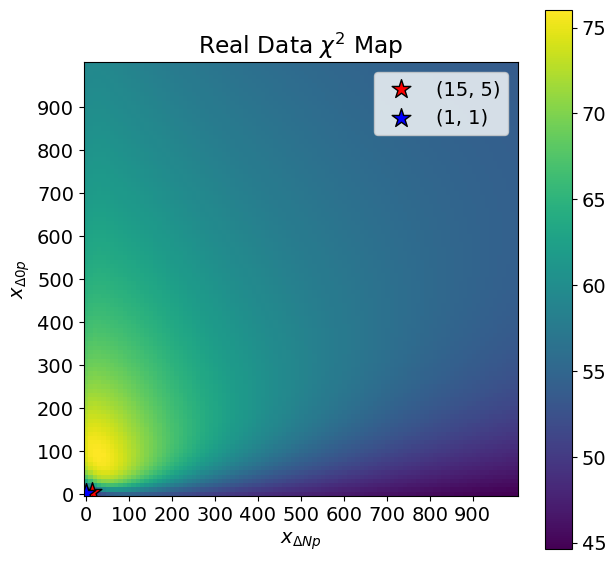

In [13]:
with open("../TLee_Np0p/data_chi2_map_100_100.txt") as f:
    lines = f.readlines()

chi2_map = np.zeros((101, 101))
for i, line in enumerate(lines):
    i = int(line.split(",")[0][1:].strip())
    j = int(line.split(":")[0].split(",")[1][:-2].strip())
    chi2 = float(line.split(":")[1].strip())

    #print(i, j, chi2)

    chi2_map[i, j] = chi2

chi2_map = chi2_map.T

plt.figure(figsize=(7, 7))
plt.imshow(chi2_map, origin='lower')
plt.colorbar()
plt.scatter(15, 5, c="r", label="(15, 5)", marker="*", s=200, edgecolors="k")
plt.scatter(1, 1, c="b", label="(1, 1)", marker="*", s=200, edgecolors="k")
plt.legend()
plt.xlabel(r"$x_{\Delta N p}$")
plt.ylabel(r"$x_{\Delta 0 p}$")
plt.title(r"Real Data $\chi^2$ Map")
plt.show()


with open("../TLee_Np0p/data_chi2_map_1000_1000.txt") as f:
    lines = f.readlines()

chi2_map = np.zeros((101, 101))
for i, line in enumerate(lines):
    i = int(int(line.split(",")[0][1:].strip()) / 10)
    j = int(int(line.split(":")[0].split(",")[1][:-2].strip()) / 10)

    chi2 = float(line.split(":")[1].strip())

    #print(i, j, chi2)

    chi2_map[i, j] = chi2

chi2_map = chi2_map.T

plt.figure(figsize=(7, 7))
plt.imshow(chi2_map, origin='lower')
plt.colorbar()
plt.scatter(15/10, 5/10, c="r", label="(15, 5)", marker="*", s=200, edgecolors="k")
plt.scatter(1/10, 1/10, c="b", label="(1, 1)", marker="*", s=200, edgecolors="k")

plt.xticks(np.arange(0, 100, 10), np.arange(0, 1000, 100))
plt.yticks(np.arange(0, 100, 10), np.arange(0, 1000, 100))

plt.legend()
plt.xlabel(r"$x_{\Delta N p}$")
plt.ylabel(r"$x_{\Delta 0 p}$")
plt.title(r"Real Data $\chi^2$ Map")
plt.show()


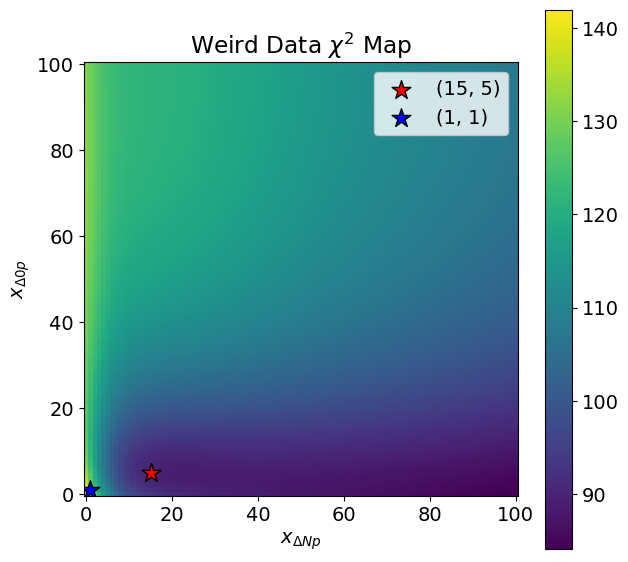

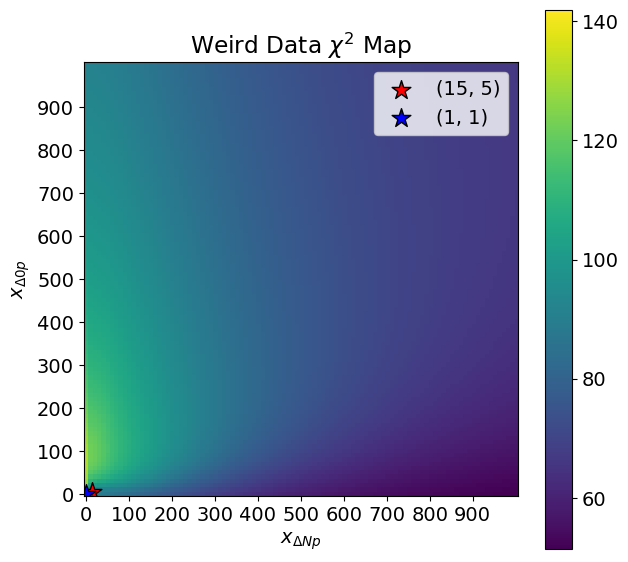

In [14]:
with open("../TLee_Np0p/weird_data_chi2_map_100_100.txt") as f:
    lines = f.readlines()

chi2_map = np.zeros((101, 101))
for i, line in enumerate(lines):
    i = int(line.split(",")[0][1:].strip())
    j = int(line.split(":")[0].split(",")[1][:-2].strip())
    chi2 = float(line.split(":")[1].strip())

    #print(i, j, chi2)

    chi2_map[i, j] = chi2

chi2_map = chi2_map.T

plt.figure(figsize=(7, 7))
plt.imshow(chi2_map, origin='lower')
plt.colorbar()
plt.scatter(15, 5, c="r", label="(15, 5)", marker="*", s=200, edgecolors="k")
plt.scatter(1, 1, c="b", label="(1, 1)", marker="*", s=200, edgecolors="k")
plt.legend()
plt.xlabel(r"$x_{\Delta N p}$")
plt.ylabel(r"$x_{\Delta 0 p}$")
plt.title(r"Weird Data $\chi^2$ Map")
plt.show()


with open("../TLee_Np0p/weird_data_chi2_map_1000_1000.txt") as f:
    lines = f.readlines()

chi2_map = np.zeros((101, 101))
for i, line in enumerate(lines):
    i = int(int(line.split(",")[0][1:].strip()) / 10)
    j = int(int(line.split(":")[0].split(",")[1][:-2].strip()) / 10)

    chi2 = float(line.split(":")[1].strip())

    #print(i, j, chi2)

    chi2_map[i, j] = chi2

chi2_map = chi2_map.T

plt.figure(figsize=(7, 7))
plt.imshow(chi2_map, origin='lower')
plt.colorbar()
plt.scatter(15/10, 5/10, c="r", label="(15, 5)", marker="*", s=200, edgecolors="k")
plt.scatter(1/10, 1/10, c="b", label="(1, 1)", marker="*", s=200, edgecolors="k")
plt.xticks(np.arange(0, 100, 10), np.arange(0, 1000, 100))
plt.yticks(np.arange(0, 100, 10), np.arange(0, 1000, 100))
plt.legend()
plt.xlabel(r"$x_{\Delta N p}$")
plt.ylabel(r"$x_{\Delta 0 p}$")
plt.title(r"Weird Data $\chi^2$ Map")
plt.show()


## Constrained $\chi^2$

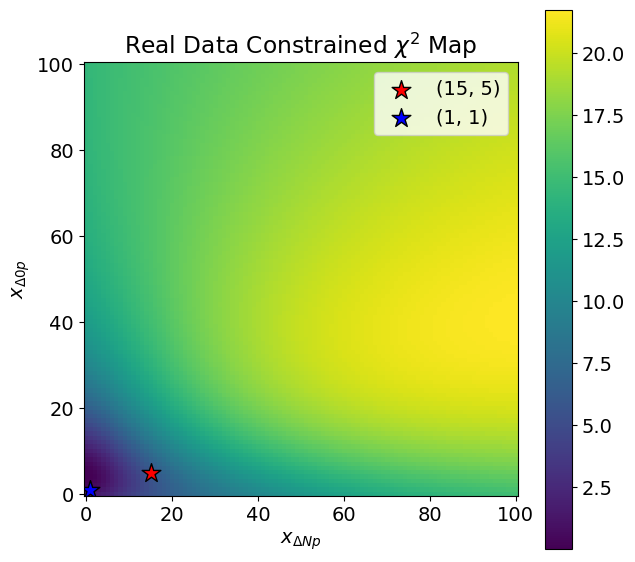

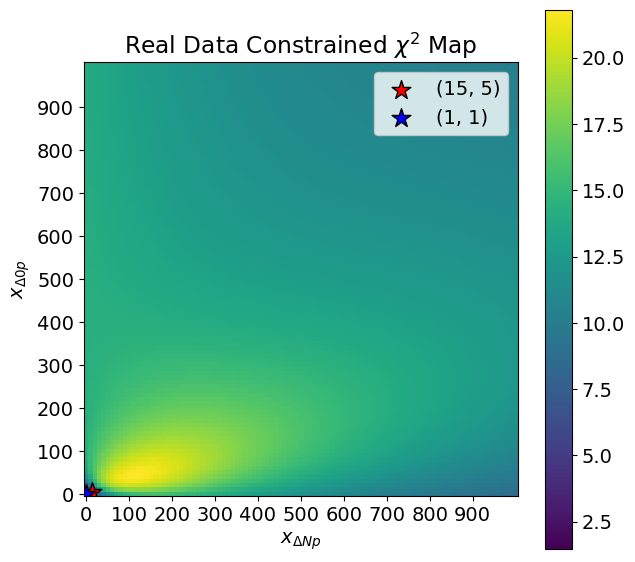

In [15]:
with open("../TLee_Np0p/constr_data_chi2_map_100_100.txt") as f:
    lines = f.readlines()

chi2_map = np.zeros((101, 101))
for i, line in enumerate(lines):
    i = int(line.split(",")[0][1:].strip())
    j = int(line.split(":")[0].split(",")[1][:-2].strip())
    chi2 = float(line.split(":")[1].strip())

    #print(i, j, chi2)

    chi2_map[i, j] = chi2

chi2_map = chi2_map.T

plt.figure(figsize=(7, 7))
plt.imshow(chi2_map, origin='lower')
plt.colorbar()
plt.scatter(15, 5, c="r", label="(15, 5)", marker="*", s=200, edgecolors="k")
plt.scatter(1, 1, c="b", label="(1, 1)", marker="*", s=200, edgecolors="k")
plt.legend()
plt.xlabel(r"$x_{\Delta N p}$")
plt.ylabel(r"$x_{\Delta 0 p}$")
plt.title(r"Real Data Constrained $\chi^2$ Map")
plt.show()


with open("../TLee_Np0p/constr_data_chi2_map_1000_1000.txt") as f:
    lines = f.readlines()

chi2_map = np.zeros((101, 101))
for i, line in enumerate(lines):
    i = int(int(line.split(",")[0][1:].strip()) / 10)
    j = int(int(line.split(":")[0].split(",")[1][:-2].strip()) / 10)

    chi2 = float(line.split(":")[1].strip())

    #print(i, j, chi2)

    chi2_map[i, j] = chi2

chi2_map = chi2_map.T

plt.figure(figsize=(7, 7))
plt.imshow(chi2_map, origin='lower')
plt.colorbar()
plt.scatter(15/10, 5/10, c="r", label="(15, 5)", marker="*", s=200, edgecolors="k")
plt.scatter(1/10, 1/10, c="b", label="(1, 1)", marker="*", s=200, edgecolors="k")
plt.xticks(np.arange(0, 100, 10), np.arange(0, 1000, 100))
plt.yticks(np.arange(0, 100, 10), np.arange(0, 1000, 100))
plt.legend()
plt.xlabel(r"$x_{\Delta N p}$")
plt.ylabel(r"$x_{\Delta 0 p}$")
plt.title(r"Real Data Constrained $\chi^2$ Map")
plt.show()


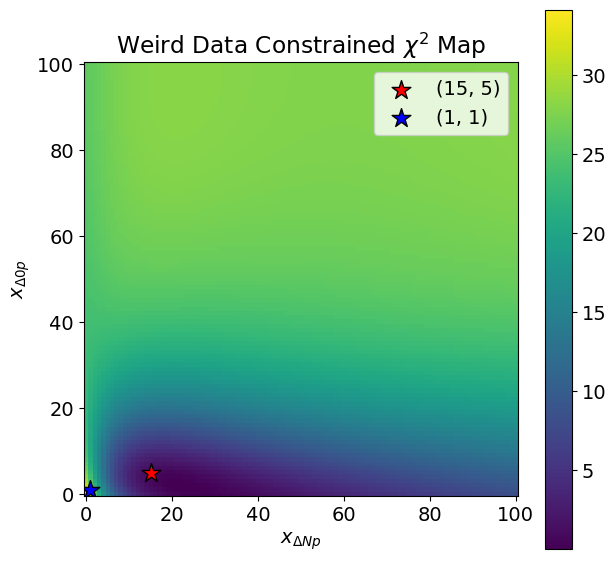

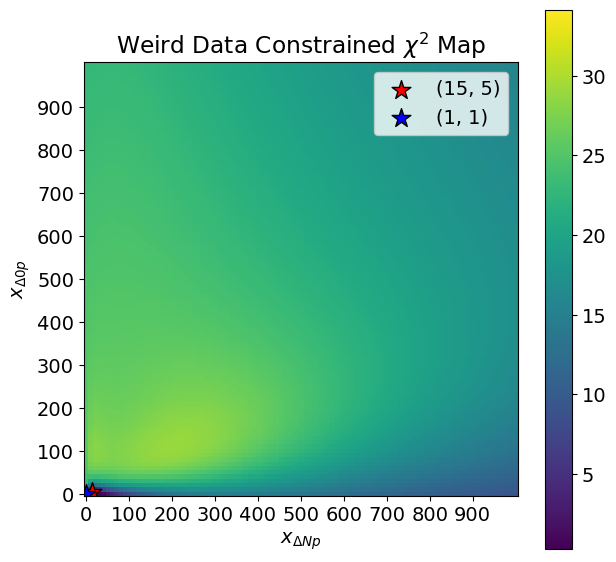

In [16]:
with open("../TLee_Np0p/constr_weird_data_chi2_map_100_100.txt") as f:
    lines = f.readlines()

chi2_map = np.zeros((101, 101))
for i, line in enumerate(lines):
    i = int(line.split(",")[0][1:].strip())
    j = int(line.split(":")[0].split(",")[1][:-2].strip())
    chi2 = float(line.split(":")[1].strip())

    #print(i, j, chi2)

    chi2_map[i, j] = chi2

chi2_map = chi2_map.T

plt.figure(figsize=(7, 7))
plt.imshow(chi2_map, origin='lower')
plt.colorbar()
plt.scatter(15, 5, c="r", label="(15, 5)", marker="*", s=200, edgecolors="k")
plt.scatter(1, 1, c="b", label="(1, 1)", marker="*", s=200, edgecolors="k")
plt.legend()
plt.xlabel(r"$x_{\Delta N p}$")
plt.ylabel(r"$x_{\Delta 0 p}$")
plt.title(r"Weird Data Constrained $\chi^2$ Map")
plt.show()


with open("../TLee_Np0p/constr_weird_data_chi2_map_1000_1000.txt") as f:
    lines = f.readlines()

chi2_map = np.zeros((101, 101))
for i, line in enumerate(lines):
    i = int(int(line.split(",")[0][1:].strip()) / 10)
    j = int(int(line.split(":")[0].split(",")[1][:-2].strip()) / 10)

    chi2 = float(line.split(":")[1].strip())

    #print(i, j, chi2)

    chi2_map[i, j] = chi2

chi2_map = chi2_map.T

plt.figure(figsize=(7, 7))
plt.imshow(chi2_map, origin='lower')
plt.colorbar()
plt.scatter(15/10, 5/10, c="r", label="(15, 5)", marker="*", s=200, edgecolors="k")
plt.scatter(1/10, 1/10, c="b", label="(1, 1)", marker="*", s=200, edgecolors="k")
plt.xticks(np.arange(0, 100, 10), np.arange(0, 1000, 100))
plt.yticks(np.arange(0, 100, 10), np.arange(0, 1000, 100))
plt.legend()
plt.xlabel(r"$x_{\Delta N p}$")
plt.ylabel(r"$x_{\Delta 0 p}$")
plt.title(r"Weird Data Constrained $\chi^2$ Map")
plt.show()


In [20]:
155/402


0.3855721393034826

In [17]:
print(1/0)

ZeroDivisionError: division by zero

# Constrained and Unconstrained Signal Channel Covariance Matrices

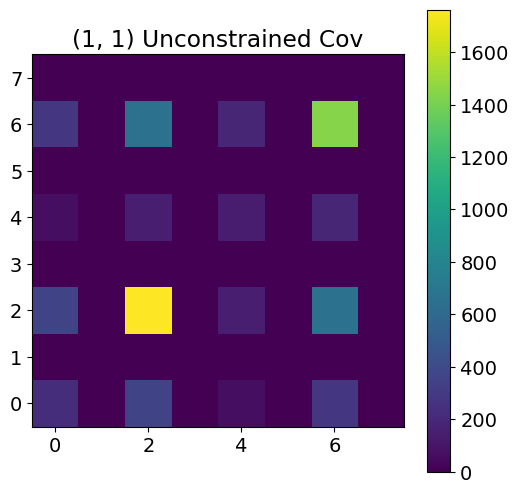

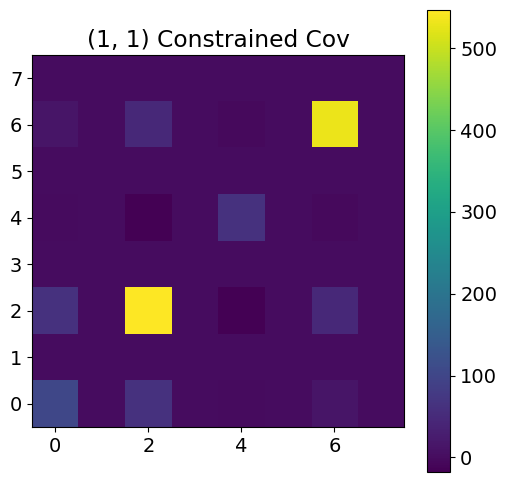

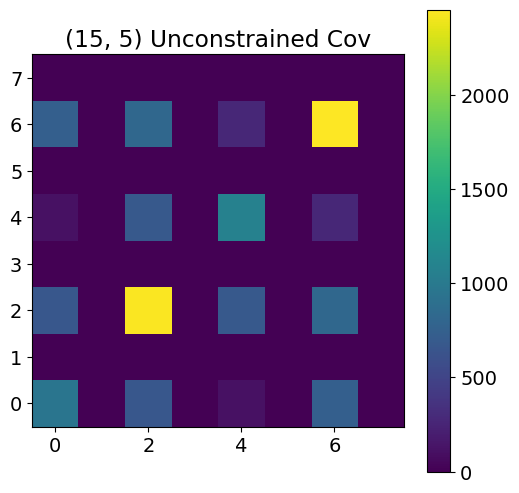

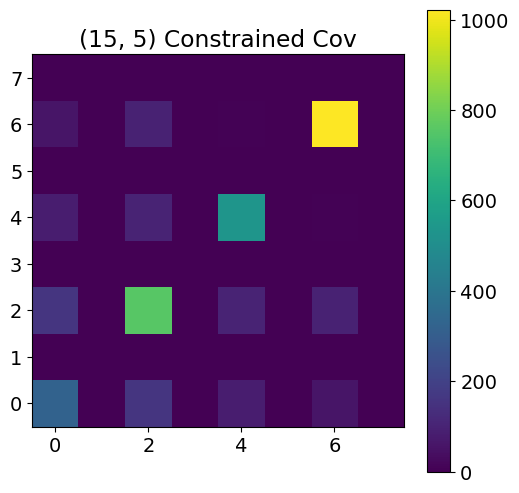

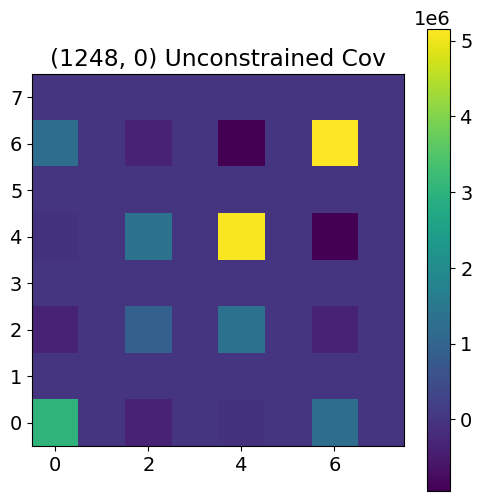

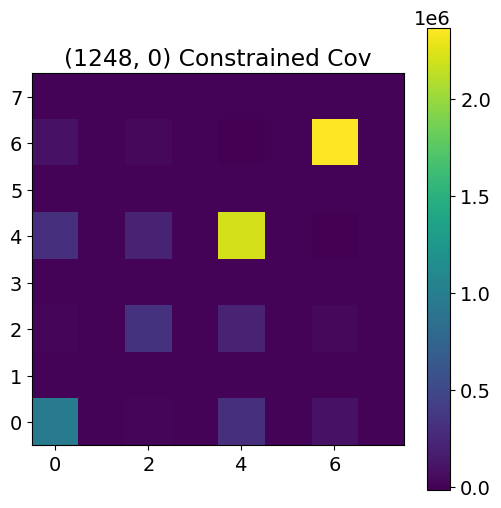

In [ ]:
plt.figure(figsize=(6, 6))
plt.imshow(unconstr_cov_1_1, origin='lower')
plt.colorbar()
plt.title("(1, 1) Unconstrained Cov")
plt.show()

plt.figure(figsize=(6, 6))
plt.imshow(constr_cov_1_1, origin='lower')
plt.colorbar()
plt.title("(1, 1) Constrained Cov")
plt.show()

plt.figure(figsize=(6, 6))
plt.imshow(unconstr_cov_best_15_5, origin='lower')
plt.colorbar()
plt.title("(15, 5) Unconstrained Cov")
plt.show()

plt.figure(figsize=(6, 6))
plt.imshow(constr_cov_best_15_5, origin='lower')
plt.colorbar()
plt.title("(15, 5) Constrained Cov")
plt.show()

plt.figure(figsize=(6, 6))
plt.imshow(unconstr_cov_best_1248_0, origin='lower')
plt.colorbar()
plt.title("(1248, 0) Unconstrained Cov")
plt.show()

plt.figure(figsize=(6, 6))
plt.imshow(constr_cov_best_1248_0, origin='lower')
plt.colorbar()
plt.title("(1248, 0) Constrained Cov")
plt.show()



/tmp/ipykernel_1022481/2085758880.py:1: RuntimeWarning: divide by zero encountered in divide
  unconstr_cov_1_1_frac = unconstr_cov_1_1 / np.outer(unconstr_pred_1_1, unconstr_pred_1_1)
/tmp/ipykernel_1022481/2085758880.py:1: RuntimeWarning: invalid value encountered in divide
  unconstr_cov_1_1_frac = unconstr_cov_1_1 / np.outer(unconstr_pred_1_1, unconstr_pred_1_1)
/tmp/ipykernel_1022481/2085758880.py:2: RuntimeWarning: divide by zero encountered in divide
  constr_cov_1_1_frac = constr_cov_1_1 / np.outer(constr_pred_1_1, constr_pred_1_1)
/tmp/ipykernel_1022481/2085758880.py:2: RuntimeWarning: invalid value encountered in divide
  constr_cov_1_1_frac = constr_cov_1_1 / np.outer(constr_pred_1_1, constr_pred_1_1)
/tmp/ipykernel_1022481/2085758880.py:3: RuntimeWarning: divide by zero encountered in divide
  unconstr_cov_15_5_frac = unconstr_cov_best_15_5 / np.outer(unconstr_pred_best_15_5, unconstr_pred_best_15_5)
/tmp/ipykernel_1022481/2085758880.py:3: RuntimeWarning: invalid value enco

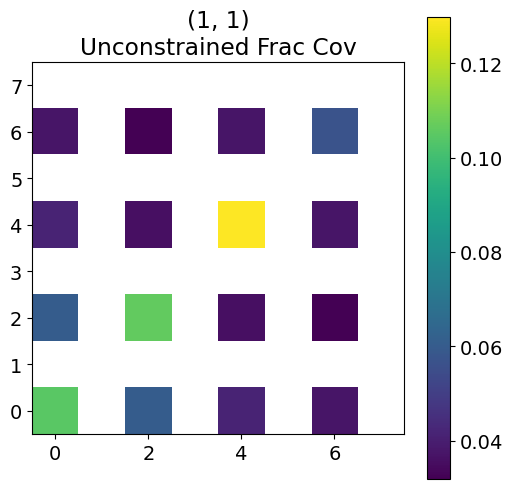

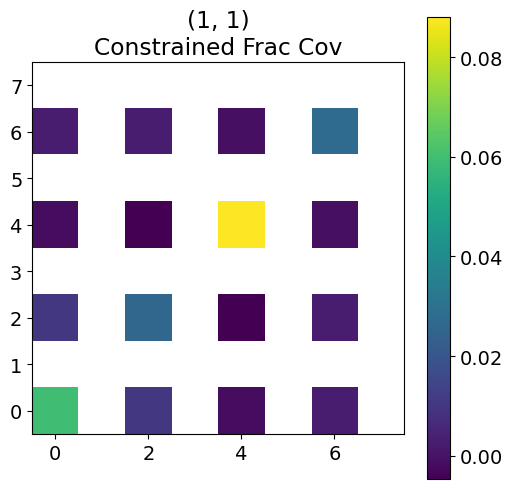

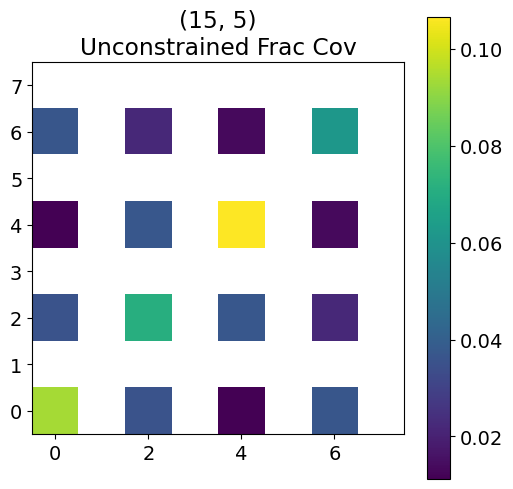

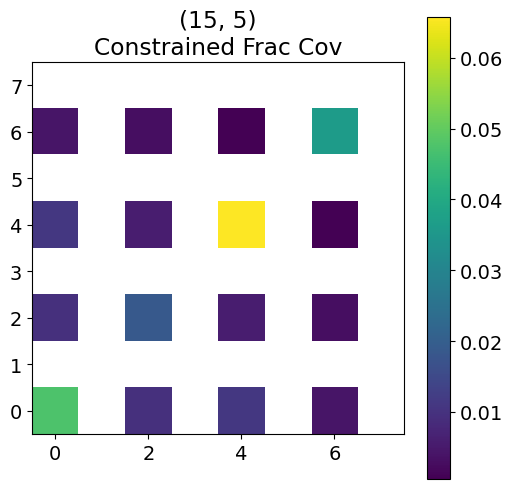

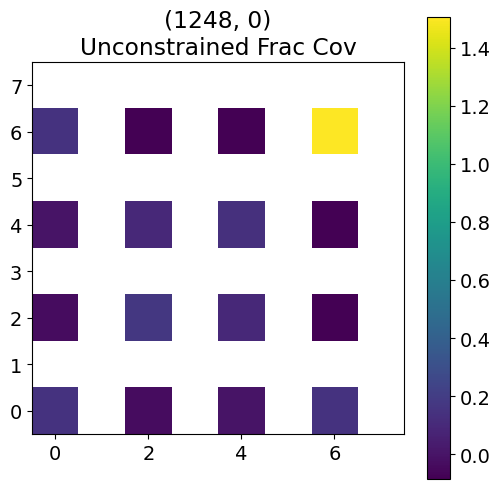

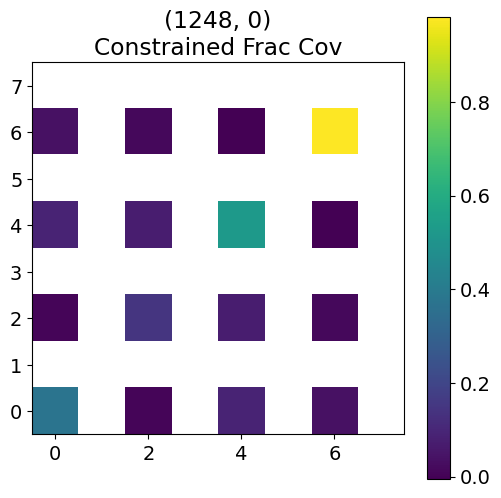

In [ ]:
unconstr_cov_1_1_frac = unconstr_cov_1_1 / np.outer(unconstr_pred_1_1, unconstr_pred_1_1)
constr_cov_1_1_frac = constr_cov_1_1 / np.outer(constr_pred_1_1, constr_pred_1_1)
unconstr_cov_15_5_frac = unconstr_cov_best_15_5 / np.outer(unconstr_pred_best_15_5, unconstr_pred_best_15_5)
constr_cov_15_5_frac = constr_cov_best_15_5 / np.outer(constr_pred_best_15_5, constr_pred_best_15_5)
unconstr_cov_1248_0_frac = unconstr_cov_best_1248_0 / np.outer(unconstr_pred_best_1248_0, unconstr_pred_best_1248_0)
constr_cov_1248_0_frac = constr_cov_best_1248_0 / np.outer(constr_pred_best_1248_0, constr_pred_best_1248_0)

plt.figure(figsize=(6, 6))
plt.imshow(unconstr_cov_1_1_frac, origin='lower')
plt.colorbar()
plt.title("(1, 1)\nUnconstrained Frac Cov")
plt.show()

plt.figure(figsize=(6, 6))
plt.imshow(constr_cov_1_1_frac, origin='lower')
plt.colorbar()
plt.title("(1, 1)\nConstrained Frac Cov")
plt.show()

plt.figure(figsize=(6, 6))
plt.imshow(unconstr_cov_15_5_frac, origin='lower')
plt.colorbar()
plt.title("(15, 5)\nUnconstrained Frac Cov")
plt.show()

plt.figure(figsize=(6, 6))
plt.imshow(constr_cov_15_5_frac, origin='lower')
plt.colorbar()
plt.title("(15, 5)\nConstrained Frac Cov")
plt.show()

plt.figure(figsize=(6, 6))
plt.imshow(unconstr_cov_1248_0_frac, origin='lower')
plt.colorbar()
plt.title("(1248, 0)\nUnconstrained Frac Cov")
plt.show()

plt.figure(figsize=(6, 6))
plt.imshow(constr_cov_1248_0_frac, origin='lower')
plt.colorbar()
plt.title("(1248, 0)\nConstrained Frac Cov")
plt.show()

